In [1]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
import random as rd
from sklearn.decomposition import PCA
from IPython.display import display
import os 
from pathlib import Path
import shutil 
import cv2

## Vamos  a sacar el atributo de estructura (b_structure) de este notebook. 

### Para eso utilizamos los landmarks alineados e imagenes warpeadas que alinee en la parte de forma.

### Por un lado obtenemos los 21 features que corresponden a la forma (17) y los que además usan la textura(4), para los 21 features, estos los sacamos unicamente para los frames0.

### Por otro lado, para todas las imagenes sacamos su diferencia de emocion. 

### Luego de tener ambas, juntamos los features para cada imagen, y hacemos PCA con estos

### Vamos a sacar los  17 primeros landmarks--lo  hacemos de la frame 0  de cada secuencia



In [2]:
my_data = pd.read_csv('transformed_landmarks_procustres_training_totalxy.csv',header = None)
my_data #orden xy

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,265.050800,265.134280,266.581590,273.107110,285.159460,305.647910,326.266310,351.728120,383.572310,416.076590,...,403.721050,384.339700,365.114420,352.872000,351.195620,351.417280,365.428210,383.166430,393.743530,381.331230
1,265.028347,265.090219,266.500422,272.908265,284.910370,305.883660,326.333125,351.536002,383.366617,415.973061,...,404.051104,384.706350,365.222934,352.914874,351.325249,351.441604,365.574953,383.511429,394.218230,381.500028
2,265.028347,265.090219,266.500422,272.908265,284.910370,305.883660,326.333125,351.536002,383.366617,415.973061,...,404.051104,384.706350,365.222934,352.914874,351.325249,351.441604,365.574953,383.511429,394.218230,381.500028
3,265.028347,265.090219,266.500422,272.908265,284.910370,305.883660,326.333125,351.536002,383.366617,415.973061,...,404.051104,384.706350,365.222934,352.914874,351.325249,351.441604,365.574953,383.511429,394.218230,381.500028
4,265.097665,265.181280,266.630442,273.155881,285.216035,305.683555,326.286254,351.731110,383.565082,416.064030,...,403.827309,384.416376,365.129436,352.834232,351.132322,351.374863,365.450918,383.259581,393.870575,381.419012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,249.974311,248.541273,254.154469,260.998767,267.026330,284.196333,312.655215,347.279260,383.654926,420.264354,...,383.555943,378.479844,359.341573,346.497199,346.635044,347.257814,356.444309,366.815504,370.028959,371.097026
3610,250.046423,248.576378,254.217372,261.038590,267.039701,284.226760,312.674930,347.297675,383.660595,420.258539,...,383.497150,378.421805,359.335595,346.467453,346.615505,347.267787,356.450847,366.834351,370.001805,371.099828
3611,249.936612,248.534305,254.127577,260.991442,267.023300,284.143975,312.607398,347.241663,383.627080,420.263137,...,383.486877,378.524516,359.365862,346.538825,346.706262,347.307411,356.410768,366.735781,369.927457,371.072954
3612,249.916927,248.522125,254.106740,260.984156,267.035487,284.188326,312.658089,347.272305,383.658269,420.271966,...,383.790889,378.627447,359.392009,346.452478,346.574275,347.169828,356.476551,366.957381,370.283189,371.253189


In [3]:
cant_frames_per_seq = pd.read_csv('cktraining_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq =np.asarray(cant_frames_per_seq).flatten()

In [4]:
cant_frames_per_seq[0]

14

In [19]:
### Aca tenemos que guardarnos cada frame0

In [25]:
def get_first_frames_and_images(path):
    first_images = []
    first_frames = []
    total = 0
    first_frames.append(my_data.iloc[total])#first frame of first secuence
    first_images.append(path + '/' + 'warped_image_procustres_' + str(total)+ '.png')
    
    for i in range(0, len(cant_frames_per_seq)-1):
        total = total+cant_frames_per_seq[i]
        first_frames.append(my_data.iloc[total])
        first_images.append(subjects_images + '/' + 'warped_image_procustres_' + str(total)+ '.png')

    first_frames = np.asarray( first_frames, dtype=object)   
    first_images = np.asarray( first_images, dtype=object) 
    
    return first_frames, first_images

def get_first_frames(path):
    return get_first_frames_and_images(path)[0]
    
def get_first_images(path):
    return get_first_frames_and_images(path)[1]

In [35]:

subjects_images = '../ck+warpedtraining'

first_images = []
first_frames = []
total = 0
first_frames.append(my_data.iloc[total])#first frame of first secuence
first_images.append(subjects_images + '/' + 'warped_image_procustres_' + str(total)+ '.png')

for i in range(0, len(cant_frames_per_seq)-1):
    total = total+cant_frames_per_seq[i]
    first_frames.append(my_data.iloc[total])
    first_images.append(subjects_images + '/' + 'warped_image_procustres_' + str(total)+ '.png')

    
first_frames = np.asarray( first_frames, dtype=object)   
first_images = np.asarray( first_images, dtype=object)   

In [31]:
first_images

array(['../ck+warpedtraining/warped_image_procustres_0.png',
       '../ck+warpedtraining/warped_image_procustres_14.png',
       '../ck+warpedtraining/warped_image_procustres_33.png',
       '../ck+warpedtraining/warped_image_procustres_48.png',
       '../ck+warpedtraining/warped_image_procustres_64.png',
       '../ck+warpedtraining/warped_image_procustres_86.png',
       '../ck+warpedtraining/warped_image_procustres_100.png',
       '../ck+warpedtraining/warped_image_procustres_121.png',
       '../ck+warpedtraining/warped_image_procustres_141.png',
       '../ck+warpedtraining/warped_image_procustres_154.png',
       '../ck+warpedtraining/warped_image_procustres_184.png',
       '../ck+warpedtraining/warped_image_procustres_216.png',
       '../ck+warpedtraining/warped_image_procustres_233.png',
       '../ck+warpedtraining/warped_image_procustres_248.png',
       '../ck+warpedtraining/warped_image_procustres_264.png',
       '../ck+warpedtraining/warped_image_procustres_279.png',

In [34]:
first_fr = get_first_frames(subjects_images)
first_im= get_first_images(subjects_images)
first_im

array(['../ck+warpedtraining/warped_image_procustres_0.png',
       '../ck+warpedtraining/warped_image_procustres_14.png',
       '../ck+warpedtraining/warped_image_procustres_33.png',
       '../ck+warpedtraining/warped_image_procustres_48.png',
       '../ck+warpedtraining/warped_image_procustres_64.png',
       '../ck+warpedtraining/warped_image_procustres_86.png',
       '../ck+warpedtraining/warped_image_procustres_100.png',
       '../ck+warpedtraining/warped_image_procustres_121.png',
       '../ck+warpedtraining/warped_image_procustres_141.png',
       '../ck+warpedtraining/warped_image_procustres_154.png',
       '../ck+warpedtraining/warped_image_procustres_184.png',
       '../ck+warpedtraining/warped_image_procustres_216.png',
       '../ck+warpedtraining/warped_image_procustres_233.png',
       '../ck+warpedtraining/warped_image_procustres_248.png',
       '../ck+warpedtraining/warped_image_procustres_264.png',
       '../ck+warpedtraining/warped_image_procustres_279.png',

In [36]:
result = (first_fr == first_frames).all()
result

True

In [36]:
#Vamos a usar el orden intercalado para los feature points,
#lo hacemos solo con las primeras frames porque la estructura
#de la cara no cambia
intercalated_first_frames = []
for fframe in first_frames:
    xaxis = fframe[0: int(len(first_frames[0])/2)]
    yaxis = fframe[int(len(first_frames[0])/2):len(first_frames[0])]
    lan =[]
    for (a, b) in zip(xaxis, yaxis):
        lan.append(np.asarray([a,b]))        
    intercalated_first_frames.append( np.asarray(lan))
intercalated_first_frames = np.asarray(intercalated_first_frames)

In [37]:
intercalated_first_frames.shape

(190, 68, 2)

In [38]:
first_frame = intercalated_first_frames

In [24]:
first_frame[0]

array([[265.0508 , 235.20293],
       [265.13428, 267.96751],
       [266.58159, 300.26222],
       [273.10711, 332.17964],
       [285.15946, 362.43119],
       [305.64791, 388.11916],
       [326.26631, 413.01333],
       [351.72812, 432.93272],
       [383.57231, 436.38575],
       [416.07659, 431.76955],
       [444.07285, 415.27008],
       [463.04949, 388.75845],
       [474.88119, 358.8677 ],
       [484.37324, 327.50411],
       [488.33405, 294.94015],
       [493.69735, 262.6749 ],
       [495.53709, 230.48113],
       [272.72158, 205.77172],
       [285.94009, 189.23394],
       [307.03562, 185.34416],
       [328.65736, 188.59208],
       [346.17715, 201.0486 ],
       [401.94885, 192.42688],
       [420.28459, 178.33151],
       [441.93144, 171.43151],
       [464.26289, 175.04457],
       [480.84314, 190.17066],
       [375.20929, 212.69576],
       [376.06307, 239.6232 ],
       [376.37229, 266.26507],
       [378.018  , 292.81867],
       [354.71128, 313.43082],
       [

In [10]:
feature_points_options = {1 : feature_point_one,
           2 : feature_point_two,
           3 : feature_point_three,
           4 : feature_point_four,
           5 : feature_point_five,
           6 : feature_point_six,
           7 : feature_point_seven,
           8 : feature_point_eight,
           9 : feature_point_nine,
           10 : feature_point_ten,
           11 : feature_point_eleven,
           12 : feature_point_twelve,
           13 : feature_point_thirteen,
           14 : feature_point_fourteen,
           15 : feature_point_fifteen,
           16 : feature_point_sixteen,
           17 : feature_point_seventeen,
           18 : feature_point_eighteen,
           19 : feature_point_nineteen,
           20 : feature_point_twenty,
           21 : feature_point_twentyone,
}

In [30]:
def get_feature_point(im, number, imagen):
    if number == 19 or number == 20 or number == 21 :
        res = feature_points_options[number](im, imagen)
    else:
        res = feature_points_options[number](im)
    return res

In [14]:
def list_get_feature_number(lista, number, imagenlist):
    res = []
    for i in range(0, len(lista)):
        fea_p = get_feature_point(lista[i], number, imagenlist[i])
        res.append(fea_p)
    return np.asarray(res,dtype= object)
    

In [41]:
first_frame[0].shape

(68, 2)

In [44]:
def list_get_feature_point(lista, number, imagenlist):
    res = list_get_feature_number(lista, number, imagenlist)
    return res

first = list_get_feature_point(first_frame, 1, first_images)
first.shape

(190,)

In [9]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def feature_point_one(im):
    point1 = im[18][0]
    point2 = im[25][0]
    return np.abs(point2-point1)

def feature_point_two(im):
    point1 = im[1][0]
    point2 = im[15][0]
    return np.abs(point2-point1)
   
def feature_point_three(im):
    point1 = im[1][0]
    point2 = im[14][0]
    return np.abs(point2-point1)

def feature_point_four(im):   
    point1a = im[3][0]
    point2a = im[13][0]        
    point1b = im[4][0]
    point2b = im[12][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    return np.abs(point2-point1)

def feature_point_five(im):   
    point1 = im[6][0]
    point2 = im[10][0]    
    return np.abs(point2-point1)

def feature_point_six(im):
    point1 = im[31][0]
    point2 = im[35][0]
    return np.abs(point2-point1)

def feature_point_seven(im):
    point1 = im[61][0]
    point2 = im[65][0]
    return np.abs(point2-point1)

def feature_point_eight(im):
    point1a = im[37][0]
    point2a = im[43][0]        
    point1b = im[38][0]
    point2b = im[44][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    return np.abs(point2-point1)

def feature_point_nine(im):
    point1 = im[42][0]
    point2 = im[45][0]
    return np.abs(point2-point1)

def feature_point_ten(im):
    point1 = im[39][0]
    point2 = im[42][0]
    return np.abs(point2-point1)

def feature_point_eleven(im):
    point1 = im[36][0]
    point2 = im[39][0]
    return np.abs(point2-point1)

def feature_point_twelve(im):
    point1 = im[27][1]
    point2 = im[33][1]
    return np.abs(point2-point1)

def feature_point_thirteen(im):
    point1 = im[33][1]
    point2 = im[8][1]
    return np.abs(point2-point1)

def feature_point_fourteen(im):
    point1a = im[38][1]
    point2a = im[20][1]        
    point1b = im[43][1]
    point2b = im[23][1]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    return np.abs(point2-point1)

def feature_point_fifteen(im):
    point1 = im[37][1]
    point2 = im[41][1]        
    point3 = im[38][1]
    point4 = im[40][1]     
    point5 = im[43][1]
    point6 = im[47][1]        
    point7 = im[44][1]
    point8 = im[46][1]
    point_pair1 = np.abs(point2-point1)
    point_pair2 = np.abs(point4-point3)
    point_pair3 = np.abs(point6-point5)
    point_pair4 = np.abs(point8-point7)
    return np.mean(np.array([point_pair1, point_pair2, point_pair3, point_pair4]))
    
def feature_point_sixteen(im):
    point1 = im[33][1]
    point2 = im[56][1]
    return  np.abs(point2-point1)

def feature_point_seventeen(im):
    point1 = im[67][1]
    point2 = im[8][1]
    return  np.abs(point2-point1)

def feature_point_eighteen(im):
    points = im[39:59]
    hull = ConvexHull(points)   
    return  hull.volume

def feature_point_ninetotwentyone(im, imagen):
        #Rectangulo actual en anterorior era siempre imagen 0. FIjarsefirst_frame[0][1][0]
    left_cheek_x0 = int(im[1][0])#x de landmark 2
    left_cheek_x1 = int(im[31][0])#
    left_cheek_y0 = int(im[28][1])
    left_cheek_y1 = int(im[2][1])

    right_cheek_x0 = int(im[35][0])#x de landmark 2
    right_cheek_x1 = int(im[15][0])#
    right_cheek_y0 = int(im[28][1])
    right_cheek_y1 = int(im[14][1])
    
    img = cv2.imread(imagen)
    
    imgall = img[left_cheek_y0: right_cheek_y1,left_cheek_x0:right_cheek_x1 ]
    imgall =cv2.cvtColor(imgall, cv2.COLOR_BGR2GRAY)   
    nineteen, twenty, twentyone = cheeks_function_with_nose(imgall, left_cheek_y0,left_cheek_x0)
    return  nineteen, twenty, twentyone

def feature_point_nineteen(im, imagen):
    return feature_point_ninetotwentyone(im, imagen)[0]

def feature_point_twenty(im, imagen):
    return feature_point_ninetotwentyone(im, imagen)[1]

def feature_point_twentyone(im, imagen):
    return feature_point_ninetotwentyone(im, imagen)[2]



SyntaxError: invalid syntax (2640874063.py, line 2)

In [11]:
#por ahora usamos la distancia horizontal (ver 1)

In [12]:
#los primeros 17 son simples, usamos los landmarks 68 de la ck+ database, y los adaptamos al del modelo del paper (que es un modelo aam de 94 puntos) 

In [45]:
#usamos 19 y 6 porque son los mas cercanos a nivel de temple de los landmarks de ck+ y asumimos hay correlacion entre la distancia de estos y la distancia que tendria gente con temples mas largos

#Acordemonos que los array el indice va de 0-67 y en imagenes de 1 a 68, en codigo usamos -1 del que se usa en la imagen

first_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][18][0]
    point2 = first_frame[i][25][0]
    first_feature_point.append(np.abs(point2-point1))
first_feature_point = np.asarray( first_feature_point, dtype=object)
#first_feature_point
#19,26

(190,)

In [21]:
second_feature_point = []
for i in range(0, len(first_frame)):
    point1 = first_frame[i][1][0]
    point2 = first_frame[i][15][0]
    second_feature_point.append(np.abs(point2-point1))
second_feature_point = np.asarray( second_feature_point, dtype=object)
#second_feature_point
#2,16

In [22]:
third_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][1][0]
    point2 = first_frame[i][14][0]
    third_feature_point.append(np.abs(point2-point1))
third_feature_point = np.asarray( third_feature_point, dtype=object)
#third_feature_point
#3,15

In [23]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio
fourth_feature_point = []
for i in range(0, len(first_frame)):   
    point1a = first_frame[i][3][0]
    point2a = first_frame[i][13][0]        
    point1b = first_frame[i][4][0]
    point2b = first_frame[i][12][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    fourth_feature_point.append(np.abs(point2-point1))
fourth_feature_point = np.asarray( fourth_feature_point, dtype=object)
#fourth_feature_point
#diferencia de mean entre 4 y 5, 14 y 13,  

In [26]:
five_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][6][0]
    point2 = first_frame[i][10][0]
    five_feature_point.append(np.abs(point2-point1))
five_feature_point = np.asarray( five_feature_point, dtype=object)
#five_feature_point
#7,11

In [27]:
six_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][31][0]
    point2 = first_frame[i][35][0]
    six_feature_point.append(np.abs(point2-point1))
six_feature_point = np.asarray( six_feature_point, dtype=object)
#six_feature_point
#32,36

In [28]:
seven_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][61][0]
    point2 = first_frame[i][65][0]
    seven_feature_point.append(np.abs(point2-point1))
seven_feature_point = np.asarray( seven_feature_point, dtype=object)
#seven_feature_point
#61,65

In [29]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio
eight_feature_point = []
for i in range(0, len(first_frame)):   
    point1a = first_frame[i][37][0]
    point2a = first_frame[i][43][0]        
    point1b = first_frame[i][38][0]
    point2b = first_frame[i][44][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    eight_feature_point.append(np.abs(point2-point1))
eight_feature_point = np.asarray( eight_feature_point, dtype=object)
#eight_feature_point
#dieferencia entre mean de 38-39 y 44-45

In [30]:
nine_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][42][0]
    point2 = first_frame[i][45][0]
    nine_feature_point.append(np.abs(point2-point1))
nine_feature_point = np.asarray( nine_feature_point, dtype=object)
#nine_feature_point
#43 46

In [31]:
ten_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][39][0]
    point2 = first_frame[i][42][0]
    ten_feature_point.append(np.abs(point2-point1))
ten_feature_point = np.asarray( ten_feature_point, dtype=object)
#ten_feature_point
#40-43

In [32]:
eleven_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][36][0]
    point2 = first_frame[i][39][0]
    eleven_feature_point.append(np.abs(point2-point1))
eleven_feature_point = np.asarray( eleven_feature_point, dtype=object)
#eleven_feature_point
#37 40

In [24]:
#estos son vertical distance

In [33]:
twelve_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][27][1]
    point2 = first_frame[i][33][1]
    twelve_feature_point.append(np.abs(point2-point1))
twelve_feature_point = np.asarray( twelve_feature_point, dtype=object)
#twelve_feature_point
#28-34

In [34]:
thirteen_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][33][1]
    point2 = first_frame[i][8][1]
    thirteen_feature_point.append(np.abs(point2-point1))
thirteen_feature_point = np.asarray( thirteen_feature_point, dtype=object)
#thirteen_feature_point
#34 9

In [35]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio
fourteen_feature_point = []
for i in range(0, len(first_frame)):   
    point1a = first_frame[i][38][1]
    point2a = first_frame[i][20][1]        
    point1b = first_frame[i][43][1]
    point2b = first_frame[i][23][1]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    fourteen_feature_point.append(np.abs(point2-point1))
fourteen_feature_point = np.asarray( fourteen_feature_point, dtype=object)
#fourteen_feature_point
#distancia de ños means de39-44 y 21-24


In [36]:
#it says distance, I asumme is vertical pnly, but could be actual difference in witch case we use np.align
#creo que solo la vertical tiene + sentido para el height
fifteen_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][37][1]
    point2 = first_frame[i][41][1]        
    point3 = first_frame[i][38][1]
    point4 = first_frame[i][40][1]     
    point5 = first_frame[i][43][1]
    point6 = first_frame[i][47][1]        
    point7 = first_frame[i][44][1]
    point8 = first_frame[i][46][1]
    point_pair1 = np.abs(point2-point1)
    point_pair2 = np.abs(point4-point3)
    point_pair3 = np.abs(point6-point5)
    point_pair4 = np.abs(point8-point7)
    fifteen_point = np.mean(np.array([point_pair1, point_pair2, point_pair3, point_pair4]))
    fifteen_feature_point.append(fifteen_point)
fifteen_feature_point = np.asarray( fifteen_feature_point, dtype=object)
#fifteen_feature_point
#mean de las distancias de par 38-42, 39-41, 44-48, 45-47

In [37]:
sixteen_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][33][1]
    point2 = first_frame[i][56][1]
    sixteen_feature_point.append(np.abs(point2-point1))
sixteen_feature_point = np.asarray( sixteen_feature_point, dtype=object)
#sixteen_feature_point
#34-57

In [38]:
#no tenemos chin, usamos desde la boca hasta el fondo
seventeen_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][67][1]
    point2 = first_frame[i][8][1]
    seventeen_feature_point.append(np.abs(point2-point1))
seventeen_feature_point = np.asarray( seventeen_feature_point, dtype=object)
#seventeen_feature_point

#68-9



In [31]:
#Ahora vienen los feature points que involucran shape y textura
#el 18 es el area del convex hull de los labios. Usamos los landmarks que lo limitan para sacarlo

In [40]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
eigtheen_feature_point = []
for i in range(0, len(first_frame)):   
    points = first_frame[i][39:59]
    hull = ConvexHull(points)
    eigtheen_feature_point.append(hull.volume)#cause is a 2d array volume == area
eigtheen_feature_point = np.asarray( eigtheen_feature_point, dtype=object)
#eigtheen_feature_point

#40 a 60

nineteen_feature_point<- Deberia ser average curvatura de cheeks

twenty_feature_point <- Deberia ser x co-ordinate of center of mass where mass rep-
resents curvature coefficient of cheeks area

twentyone_feature_point <- Deberia ser y co-ordinate of center of mass where mass rep-
resents curvature coefficient of cheeks area

### Vamos a empezar denuevo

In [42]:
#VA A HABER QUE RASTERIZAR TAL VEZ.POR AHORA UN RECTANGULO COMUN
import numpy as np
'''
SHAPES PARA MAS ADELANTE
left_cheek = []
left_cheek.append(first_frame[0][1]
)
left_cheek.append(first_frame[0][39]
)
left_cheek.append(first_frame[0][28]
)
left_cheek.append(first_frame[0][48]
)
left_cheek.append(first_frame[0][4]
)
left_cheek.append(first_frame[0][3]
)
left_cheek.append(first_frame[0][2]
)
left_cheek = np.asarray(left_cheek)
print(left_cheek)
#left cheek


'''


##Para sacar el coefficiente de las mejillas (cheeks), usamos un rectangulo
##para cada una, basada en los 68 landmarks.
#Rectangula actual
left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
left_cheek_x1 = int(first_frame[0][31][0])#
left_cheek_y0 = int(first_frame[0][28][1])
left_cheek_y1 = int(first_frame[0][2][1])

right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
right_cheek_x1 = int(first_frame[0][15][0])#
right_cheek_y0 = int(first_frame[0][28][1])
right_cheek_y1 = int(first_frame[0][14][1])


#cargamos la imagen y separamos las cheeks, las apsamos a grey
face_example = '../ck+warpedtraining/warped_image_procustres_0.png'

img= cv2.imread(face_example)
#ROI = image[y1:y2, x1:x2]
#243 249 258 251
imgleft = img[left_cheek_y0: left_cheek_y1,left_cheek_x0:left_cheek_x1 ]
imgright = img[right_cheek_y0: right_cheek_y1,right_cheek_x0:right_cheek_x1 ]

#imageRGB = cv2.cvtColor(imgleft, cv2.COLOR_BGR2RGB)


imgleft = cv2.cvtColor(imgleft, cv2.COLOR_BGR2GRAY)
imgright =cv2.cvtColor(imgright, cv2.COLOR_BGR2GRAY)

cv2.imshow("Face landmark result", imgright)

# Pause screen to wait key from user to see result
cv2.waitKey(0)
cv2.destroyAllWindows()


In [43]:

    
def cheeks_function(imgleft, imgright, left_cheek_y0,left_cheek_x0,right_cheek_y0,right_cheek_x0):
    #usamos sobel para sacar las derivadas
    edgesxleft = cv2.Sobel(imgleft, -1, dx=1, dy=0, ksize=1)
    edgesyleft = cv2.Sobel(imgleft, -1, dx=0, dy=1, ksize=1)

    outputleft = np.zeros((len(edgesxleft),len(edgesxleft[0])))

    for i in range(0, len(edgesxleft)):
     for j in range(0, len(edgesxleft[0])):      
            outputleft[i][j] = math.sqrt(pow(edgesxleft[i][j],2) + pow(edgesyleft[i][j],2)+ pow(-1,2)) #raiz de suma de cuadrados y -1 al cuadradp

    angleleft = np.zeros((len(edgesxleft),len(edgesxleft[0]),3))  
    
    for i in range(0, len(edgesxleft)):
     for j in range(0, len(edgesxleft[0])):
            pos =np.array([edgesxleft[i][j], edgesyleft[i][j], -1]/outputleft[i][j])
            angleleft[i][j] = pos
            
    #lo mismo para la otra mejilla

    edgesxright = cv2.Sobel(imgright, -1, dx=1, dy=0, ksize=1)
    edgesyright = cv2.Sobel(imgright, -1, dx=0, dy=1, ksize=1)

    outputright = np.zeros((len(edgesxright),len(edgesxright[0])))

    for i in range(0, len(edgesxright)):
     for j in range(0, len(edgesxright[0])):       
            outputright[i][j] = math.sqrt(pow(edgesxright[i][j],2) + pow(edgesyright[i][j],2)+ pow(-1,2))

    angleright = np.zeros((len(edgesxright),len(edgesxright[0]),3))  
    for i in range(0, len(edgesxright)):
     for j in range(0, len(edgesxright[0])):
            pos =np.array([edgesxright[i][j], edgesyright[i][j], -1]/outputright[i][j])
            angleright[i][j] = pos
            
            
    beta = np.array([0,0,1])    


    #dados los angles, sacamos los coefficientes
        
    coffleft = np.zeros((len(edgesxleft),len(edgesxleft[0])))
    for i in range(0, len(edgesxleft)):
     for j in range(0, len(edgesxleft[0])):
            coffleft[i][j] = 1- np.dot(angleleft[i][j],beta)

    coffright = np.zeros((len(edgesxright),len(edgesxright[0])))
    for i in range(0, len(edgesxright)):
     for j in range(0, len(edgesxright[0])):
            coffright[i][j] = 1 - np.dot(angleright[i][j],beta)
    
    coff = np.concatenate((coffleft.flatten(), coffright.flatten()))
    coff_sum = coff.sum() #lo usamos para center of mass
    coff_average = coff.mean()#es el 19
    
    partial_sumxleft = []
    for i in range(0, len(edgesxleft)):#losy0debencambiarse arriba
     partial_sumxleft.append(coff[i]*(left_cheek_y0+i))

    partial_sumyleft = []
    for i in range(0, len(edgesxleft[0])):#losy0debencambiarse arriba
     partial_sumyleft.append(coff[len(edgesxleft)+i]*(left_cheek_x0+i))
    

    partial_sumxright = []
    for i in range(0, len(edgesxright)):#losy0debencambiarse arriba
     partial_sumxright.append(coff[i+len(edgesxleft)*len(edgesxleft[0])]*(right_cheek_y0+i))

    partial_sumyright = []
    for i in range(0, len(edgesxright[0])):#losy0debencambiarse arriba
     partial_sumyright.append(coff[len(edgesxleft)*len(edgesxleft[0])+len(edgesxright)+i]*(right_cheek_x0+i))

    partial_sumx = np.concatenate((np.asarray(partial_sumxleft),np.asarray(partial_sumxright)))    
    partial_sumy = np.concatenate((np.asarray(partial_sumyleft),np.asarray(partial_sumyright)))    

        

    #HAY QUE PREGUNTAR ESTO
    center_of_massx = np.asarray(partial_sumx).sum()/coff_sum
    center_of_massy = np.asarray(partial_sumy).sum()/coff_sum

      
    return coff_average, center_of_massx, center_of_massy  

        





Vamos a hacer otra manera de la cheeks function, esta vez con solo 1 cheek (toma la nariz tambien)

In [71]:
left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
left_cheek_x1 = int(first_frame[0][31][0])#
left_cheek_y0 = int(first_frame[0][28][1])
left_cheek_y1 = int(first_frame[0][2][1])

right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
right_cheek_x1 = int(first_frame[0][15][0])#
right_cheek_y0 = int(first_frame[0][28][1])
right_cheek_y1 = int(first_frame[0][14][1])


#cargamos la imagen y separamos las cheeks, las apsamos a grey
face_example = '../ck+warpedtraining/warped_image_procustres_0.png'

img= cv2.imread(face_example)
#ROI = image[y1:y2, x1:x2]
#243 249 258 251
imgleft = img[left_cheek_y0: left_cheek_y1,left_cheek_x0:left_cheek_x1 ]
imgright = img[right_cheek_y0: right_cheek_y1,right_cheek_x0:right_cheek_x1 ]
imgall = img[left_cheek_y0: right_cheek_y1,left_cheek_x0:right_cheek_x1 ]
#imageRGB = cv2.cvtColor(imgleft, cv2.COLOR_BGR2RGB)


imgleft = cv2.cvtColor(imgleft, cv2.COLOR_BGR2GRAY)
imgright =cv2.cvtColor(imgright, cv2.COLOR_BGR2GRAY)
imgall =cv2.cvtColor(imgall, cv2.COLOR_BGR2GRAY)
cv2.imshow("Face landmark result", imgall)

# Pause screen to wait key from user to see result
cv2.waitKey(0)
cv2.destroyAllWindows()


In [81]:

    
def cheeks_function_with_nose(imgall, left_cheek_y0,left_cheek_x0):
    #usamos sobel para sacar las derivadas
    edgesx = cv2.Sobel(imgleft, -1, dx=1, dy=0, ksize=1)
    edgesy = cv2.Sobel(imgleft, -1, dx=0, dy=1, ksize=1)
    
    output = np.zeros((len(edgesx),len(edgesx[0])))
    
    for i in range(0, len(edgesx)):
        for j in range(0, len(edgesx[0])):
            output[i][j] = math.sqrt(pow(edgesx[i][j],2) + pow(edgesy[i][j],2)+ pow(-1,2)) #raiz de suma de cuadrados y -1 al cuadradp

    angle = np.zeros((len(edgesx),len(edgesx[0]),3))
    
    for i in range(0, len(edgesx)):
        for j in range(0, len(edgesx[0])):
            pos =np.array([edgesx[i][j], edgesy[i][j], -1]/output[i][j])
            angle[i][j] = pos
            
    beta = np.array([0,0,1])    

    #dados los angles, sacamos los coefficientes
        
    coff = np.zeros((len(edgesx),len(edgesx[0])))
    for i in range(0, len(edgesx)):
        for j in range(0, len(edgesx[0])):
            coff[i][j] = 1- np.dot(angle[i][j],beta)

    
    coff = coff.flatten()
    coff_sum = coff.sum() #lo usamos para center of mass
    coff_average = coff.mean()#es el 19
    
    partial_sumx = []    
    for i in range(0, len(edgesx)):#losy0debencambiarse arriba
        partial_sumx.append(coff[i]*(left_cheek_y0+i))
    
    partial_sumy = []
    for i in range(0, len(edgesx[0])):#losy0debencambiarse arriba
        partial_sumy.append(coff[len(edgesx)+i]*(left_cheek_x0+i))  
    

  
    center_of_massx = np.asarray(partial_sumx).sum()/coff_sum
    center_of_massy = np.asarray(partial_sumy).sum()/coff_sum

      
    return coff_average, center_of_massx, center_of_massy  

In [82]:
import math


nineteen_feature = []
twenty_feature = []
twentyone_feature = []


for i in range(0, len(first_images)): 
    #Rectangulo actual #como estan alineadas pueedo usar siemre first:frame[0]
    
    left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
    left_cheek_x1 = int(first_frame[0][31][0])#
    left_cheek_y0 = int(first_frame[0][28][1])
    left_cheek_y1 = int(first_frame[0][2][1])

    right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
    right_cheek_x1 = int(first_frame[0][15][0])#
    right_cheek_y0 = int(first_frame[0][28][1])
    right_cheek_y1 = int(first_frame[0][14][1])

    print(first_images[i])
    img = cv2.imread(first_images[i])
    
    imgall = img[left_cheek_y0: right_cheek_y1,left_cheek_x0:right_cheek_x1 ]
    imgall =cv2.cvtColor(imgall, cv2.COLOR_BGR2GRAY)
    
    
    
    nineteen, twenty, twentyone = cheeks_function_with_nose(imgall, left_cheek_y0,left_cheek_x0)
    nineteen_feature.append(nineteen)
    twenty_feature.append(twenty)
    twentyone_feature.append(twentyone)

../ck+warpedtraining/warped_image_procustres_0.png
../ck+warpedtraining/warped_image_procustres_14.png
../ck+warpedtraining/warped_image_procustres_33.png
../ck+warpedtraining/warped_image_procustres_48.png
../ck+warpedtraining/warped_image_procustres_64.png
../ck+warpedtraining/warped_image_procustres_86.png
../ck+warpedtraining/warped_image_procustres_100.png
../ck+warpedtraining/warped_image_procustres_121.png
../ck+warpedtraining/warped_image_procustres_141.png
../ck+warpedtraining/warped_image_procustres_154.png
../ck+warpedtraining/warped_image_procustres_184.png
../ck+warpedtraining/warped_image_procustres_216.png
../ck+warpedtraining/warped_image_procustres_233.png
../ck+warpedtraining/warped_image_procustres_248.png
../ck+warpedtraining/warped_image_procustres_264.png
../ck+warpedtraining/warped_image_procustres_279.png
../ck+warpedtraining/warped_image_procustres_292.png
../ck+warpedtraining/warped_image_procustres_316.png
../ck+warpedtraining/warped_image_procustres_331.png


../ck+warpedtraining/warped_image_procustres_2708.png
../ck+warpedtraining/warped_image_procustres_2727.png
../ck+warpedtraining/warped_image_procustres_2737.png
../ck+warpedtraining/warped_image_procustres_2755.png
../ck+warpedtraining/warped_image_procustres_2766.png
../ck+warpedtraining/warped_image_procustres_2782.png
../ck+warpedtraining/warped_image_procustres_2806.png
../ck+warpedtraining/warped_image_procustres_2828.png
../ck+warpedtraining/warped_image_procustres_2846.png
../ck+warpedtraining/warped_image_procustres_2864.png
../ck+warpedtraining/warped_image_procustres_2887.png
../ck+warpedtraining/warped_image_procustres_2903.png
../ck+warpedtraining/warped_image_procustres_2926.png
../ck+warpedtraining/warped_image_procustres_2936.png
../ck+warpedtraining/warped_image_procustres_2947.png
../ck+warpedtraining/warped_image_procustres_2962.png
../ck+warpedtraining/warped_image_procustres_2975.png
../ck+warpedtraining/warped_image_procustres_3014.png
../ck+warpedtraining/warped_

In [44]:
import math


nineteen_feature = []
twenty_feature = []
twentyone_feature = []


for i in range(0, len(first_images)): 
    #Rectangulo actual
    
    left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
    left_cheek_x1 = int(first_frame[0][31][0])#
    left_cheek_y0 = int(first_frame[0][28][1])
    left_cheek_y1 = int(first_frame[0][2][1])

    right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
    right_cheek_x1 = int(first_frame[0][15][0])#
    right_cheek_y0 = int(first_frame[0][28][1])
    right_cheek_y1 = int(first_frame[0][14][1])

    print(first_images[i])
    img = cv2.imread(first_images[i])
    
    imgleft = img[left_cheek_y0:left_cheek_y1,left_cheek_x0:left_cheek_x1]
    #imgleft = img[left_cheek_y1:left_cheek_y0,left_cheek_x1:left_cheek_x0,:]

    imgright = img[right_cheek_y0:right_cheek_y1,right_cheek_x0:right_cheek_x1]#[,:]

    #imageRGB = cv2.cvtColor(imgleft, cv2.COLOR_BGR2RGB)

    imgleft = cv2.cvtColor(imgleft, cv2.COLOR_BGR2GRAY)
    imgright =cv2.cvtColor(imgright, cv2.COLOR_BGR2GRAY)
    
    
    
    
    nineteen, twenty, twentyone = cheeks_function(imgleft, imgright, left_cheek_y0,left_cheek_x0,right_cheek_y0,right_cheek_x0)
    nineteen_feature.append(nineteen)
    twenty_feature.append(twenty)
    twentyone_feature.append(twentyone)

../ck+warpedtraining/warped_image_procustres_0.png
../ck+warpedtraining/warped_image_procustres_14.png
../ck+warpedtraining/warped_image_procustres_33.png
../ck+warpedtraining/warped_image_procustres_48.png
../ck+warpedtraining/warped_image_procustres_64.png
../ck+warpedtraining/warped_image_procustres_86.png
../ck+warpedtraining/warped_image_procustres_100.png
../ck+warpedtraining/warped_image_procustres_121.png
../ck+warpedtraining/warped_image_procustres_141.png
../ck+warpedtraining/warped_image_procustres_154.png
../ck+warpedtraining/warped_image_procustres_184.png
../ck+warpedtraining/warped_image_procustres_216.png
../ck+warpedtraining/warped_image_procustres_233.png
../ck+warpedtraining/warped_image_procustres_248.png
../ck+warpedtraining/warped_image_procustres_264.png
../ck+warpedtraining/warped_image_procustres_279.png
../ck+warpedtraining/warped_image_procustres_292.png
../ck+warpedtraining/warped_image_procustres_316.png
../ck+warpedtraining/warped_image_procustres_331.png


../ck+warpedtraining/warped_image_procustres_2693.png
../ck+warpedtraining/warped_image_procustres_2708.png
../ck+warpedtraining/warped_image_procustres_2727.png
../ck+warpedtraining/warped_image_procustres_2737.png
../ck+warpedtraining/warped_image_procustres_2755.png
../ck+warpedtraining/warped_image_procustres_2766.png
../ck+warpedtraining/warped_image_procustres_2782.png
../ck+warpedtraining/warped_image_procustres_2806.png
../ck+warpedtraining/warped_image_procustres_2828.png
../ck+warpedtraining/warped_image_procustres_2846.png
../ck+warpedtraining/warped_image_procustres_2864.png
../ck+warpedtraining/warped_image_procustres_2887.png
../ck+warpedtraining/warped_image_procustres_2903.png
../ck+warpedtraining/warped_image_procustres_2926.png
../ck+warpedtraining/warped_image_procustres_2936.png
../ck+warpedtraining/warped_image_procustres_2947.png
../ck+warpedtraining/warped_image_procustres_2962.png
../ck+warpedtraining/warped_image_procustres_2975.png
../ck+warpedtraining/warped_

## YA obtenidos los features, los concatenamos a cada frame

In [83]:

structure_vector = first_feature_point
structure_vector = np.vstack((structure_vector, second_feature_point))
structure_vector = np.vstack((structure_vector, third_feature_point))
structure_vector = np.vstack((structure_vector, fourth_feature_point))
structure_vector = np.vstack((structure_vector, five_feature_point))
structure_vector = np.vstack((structure_vector, six_feature_point))
structure_vector = np.vstack((structure_vector, seven_feature_point))
structure_vector = np.vstack((structure_vector, eight_feature_point))
structure_vector = np.vstack((structure_vector, nine_feature_point))
structure_vector = np.vstack((structure_vector, ten_feature_point))
structure_vector = np.vstack((structure_vector, eleven_feature_point))
structure_vector = np.vstack((structure_vector, twelve_feature_point))
structure_vector = np.vstack((structure_vector, thirteen_feature_point))
structure_vector = np.vstack((structure_vector, fourteen_feature_point))
structure_vector = np.vstack((structure_vector, fifteen_feature_point))
structure_vector = np.vstack((structure_vector, sixteen_feature_point))
structure_vector = np.vstack((structure_vector, seventeen_feature_point))
structure_vector = np.vstack((structure_vector, eigtheen_feature_point))
structure_vector = np.vstack((structure_vector, nineteen_feature))
structure_vector = np.vstack((structure_vector, twenty_feature))
structure_vector = np.vstack((structure_vector, twentyone_feature))


In [84]:
structure_vector.shape #cada columna es una instancia

(21, 190)

### AHORA HAY QUE CONCATENAR LAS EMOCIONES Y PCA 

## PRIMERO HACEMOS EL CALCULO DE EMOCION

In [85]:
frame_seq_data = pd.read_csv('cktraining_landmark_FramePerSeq.csv',header = None)
frame_seq_data

,0
0,14
1,19
2,15
3,16
4,22
...,...
185,40
186,38
187,42
188,18


In [87]:
frame_seq_array = np.asarray(frame_seq_data)



In [88]:
my_data_2 = pd.read_csv('my_training_data_aligned_diff.csv',header = None)
my_data_2#aca tenemos lasdiferencias en orden xy

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
2,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
3,-0.022453,-0.044061,-0.081168,-0.198845,-0.249090,0.235750,0.066815,-0.192118,-0.205693,-0.103529,...,0.330054,0.366650,0.108514,0.042874,0.129629,0.024324,0.146743,0.344999,0.474700,0.168798
4,0.046865,0.047000,0.048852,0.048771,0.056575,0.035645,0.019944,0.002990,-0.007228,-0.012560,...,0.106259,0.076676,0.015016,-0.037768,-0.063298,-0.042417,0.022708,0.093151,0.127045,0.087782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,3.090037,2.973280,3.320166,4.358738,2.765969,0.693448,0.477218,-0.062388,-0.337231,0.009301,...,12.305099,9.856087,4.855241,-7.364659,-5.517051,-4.880066,4.682348,14.467185,17.836730,16.935998
3610,3.162148,3.008386,3.383069,4.398561,2.779340,0.723875,0.496934,-0.043972,-0.331562,0.003486,...,12.246306,9.798047,4.849263,-7.394406,-5.536589,-4.870093,4.688886,14.486032,17.809577,16.938800
3611,3.052338,2.966313,3.293274,4.351413,2.762938,0.641090,0.429402,-0.099984,-0.365077,0.008084,...,12.236034,9.900759,4.879530,-7.323033,-5.445833,-4.830469,4.648807,14.387462,17.735229,16.911926
3612,3.032653,2.954132,3.272437,4.344127,2.775125,0.685441,0.480092,-0.069342,-0.333888,0.016912,...,12.540045,10.003689,4.905677,-7.409381,-5.577819,-4.968051,4.714590,14.609063,18.090960,17.092161


In [89]:
#ai deberia ser el maximo de cada columna

Ai = my_data_2.max() # da el maximo por columnas
Ai.shape

(136,)

In [90]:
data_2_intensity = my_data_2
data_2_intensity_div = data_2_intensity/Ai
data_2_intensity_sum =  np.sum(data_2_intensity_div, axis=1)
data_2_intensity_final = data_2_intensity_sum/136
data_2_intensity_final  #the emotion for each frame
#revisar que este bien la cuenta

0       0.000000
1       0.001864
2       0.001864
3       0.001864
4      -0.000642
          ...   
3609   -0.131202
3610   -0.130837
3611   -0.131434
3612   -0.132794
3613   -0.131981
Length: 3614, dtype: float64

In [91]:
sumi=0
cant_features = 22

frame_seq_flattened = frame_seq_array.flatten()

structure_feature_vector = np.zeros((len(data_2_intensity_final), cant_features))
for i in range(0, len(frame_seq_flattened)):
    current_index = frame_seq_flattened[i]    
    for j in range(0, current_index):
        vector = structure_vector[:,i]#columna i
        vector = np.append(vector,data_2_intensity_final[j+sumi])        
        structure_feature_vector[j+sumi] = vector
    sumi = sumi + current_index
  
structure_feature_vector.shape

(3614, 22)

In [92]:
structure_feature_vector = np.asarray(structure_feature_vector)
my_df = pd.DataFrame(structure_feature_vector)
my_df.to_csv('structure_feature_training_vector.csv',header = False, index= False)

In [93]:
my_data_forPCA = pd.read_csv('structure_feature_training_vector.csv',header = None)
my_data_forPCA

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.406811,3.540661,5.037574,0.000000
1,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.406811,3.540661,5.037574,0.001864
2,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.406811,3.540661,5.037574,0.001864
3,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.406811,3.540661,5.037574,0.001864
4,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.406811,3.540661,5.037574,-0.000642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.406811,3.540661,5.037574,-0.131202
3610,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.406811,3.540661,5.037574,-0.130837
3611,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.406811,3.540661,5.037574,-0.131434
3612,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.406811,3.540661,5.037574,-0.132794


### AHORA si hacemos PCA con los 22 features

In [94]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(my_data_forPCA)
scaled_landDiff.shape

(3614, 22)

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit_transform(scaled_landDiff)
b_structure = pca.fit_transform(scaled_landDiff)
b_structure.shape # cada fila deberia ser el b de 1 frame en 12 componentes proncipales (de 22 feature points)

(3614, 13)

In [96]:
print(sum(pca.explained_variance_ratio_))


0.9788404003769448


In [97]:
my_df = pd.DataFrame(b_structure)
my_df.to_csv('pca_training_structurepoints.csv',header = False, index= False)

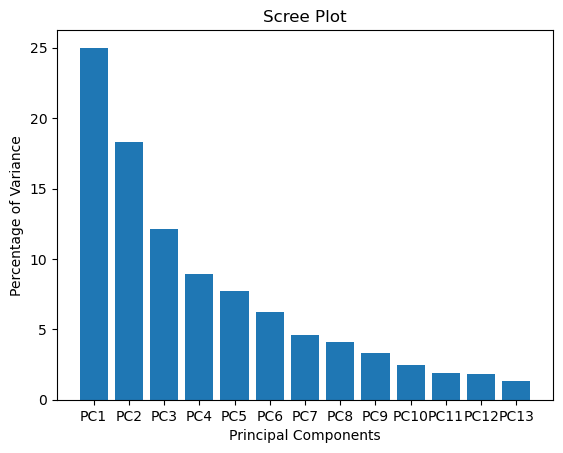

In [98]:
b_structure
pca_var=np.round(pca.explained_variance_ratio_* 100, decimals=1 )
labels = ['PC'+ str(s) for s in range(1, len(pca_var)+1)]

plt.bar(x= range(1, len(pca_var)+1), height = pca_var, tick_label= labels)
plt.ylabel("Percentage of Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()